# 자동으로 데이터 전처리 및 모델 학습을 위한 pycaret 설치하기

- [pycaret](https://pycaret.org/)은 low-code로 machine learning을 구현할 수 있도록 도와줍니다

- pycaret를 사용하기 위해 설치를 먼저 진행해줍니다

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 9.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 1.1 MB/s eta 0:

In [ ]:
import pycaret

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# 암호화폐 데이터 가져오기


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/coin_data/days/KRW-BTC.csv")
df

,market,datetime,open,high,low,close,trade_price,trade_volume,change_rate
0,KRW-BTC,2017-09-25T09:00:00,4201000.0,4333000.0,4175000.0,4322000.0,5.602146e+08,132.484755,0.028803
1,KRW-BTC,2017-09-26T09:00:00,4317000.0,4418000.0,4311000.0,4321000.0,9.950724e+07,22.788340,-0.000231
2,KRW-BTC,2017-09-27T09:00:00,4322000.0,4677000.0,4318000.0,4657000.0,1.448276e+08,32.269662,0.077760
3,KRW-BTC,2017-09-28T09:00:00,4657000.0,4772000.0,4519000.0,4586000.0,3.721860e+08,80.588243,-0.015246
4,KRW-BTC,2017-09-29T09:00:00,4586000.0,4709000.0,4476000.0,4657000.0,2.724558e+08,59.352373,0.015482
...,...,...,...,...,...,...,...,...,...
2305,KRW-BTC,2024-01-17T09:00:00,59218000.0,59300000.0,58269000.0,58776000.0,1.666847e+11,2837.334490,-0.007095
2306,KRW-BTC,2024-01-18T09:00:00,58776000.0,58900000.0,56754000.0,57284000.0,2.472746e+11,4268.883840,-0.025385
2307,KRW-BTC,2024-01-19T09:00:00,57281000.0,58180000.0,55935000.0,57739000.0,3.199353e+11,5634.881771,0.007943
2308,KRW-BTC,2024-01-20T09:00:00,57738000.0,57796000.0,57242000.0,57517000.0,1.224661e+11,2127.464542,-0.003845


# 인덱스, 문제 데이터, 정답 데이터 나눠주기

In [ ]:
index_df = df.iloc[:, :2]
X_df = df.drop(columns=list(index_df.columns)  + ["close", "change_rate"])
Y_df = df["close"]

# 비트코인 데이터의 단위를 작게 만들어주기

In [ ]:
X_df.iloc[:, :-1] = np.log1p(X_df.iloc[:, :-1])
Y_df = np.log1p(Y_df)
XY_df = pd.concat([X_df, Y_df], axis=1)
XY_df


# 자동으로 데이터 전처리하기
- Machine learning model을 학습시키기 위해 데이터를 전처리 합니다
- `setup()`을 실행하면 pycaret이 알아서 데이터를 전처리 해줍니다


In [ ]:
# 필요한 모듈 임포트
test_size = 30
exp1 = setup(
    XY_df.iloc[:-test_size],
    target='close',
    train_size=0.9,
    )

,Description,Value
0,Session id,585
1,Target,close
2,Target type,Regression
3,Original data shape,"(2280, 6)"
4,Transformed data shape,"(2280, 6)"
5,Transformed train set shape,"(2052, 6)"
6,Transformed test set shape,"(228, 6)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


# 여러 모델들의 성능 비교

In [ ]:
best_model = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lr,Linear Regression,0.0096,0.0002,0.0151,0.9997,0.0009,0.0006,0.0390
br,Bayesian Ridge,0.0096,0.0002,0.0152,0.9997,0.0009,0.0006,0.0230
ridge,Ridge Regression,0.0123,0.0004,0.0187,0.9995,0.0011,0.0007,0.0400
lar,Least Angle Regression,0.0123,0.0004,0.0199,0.9994,0.0011,0.0007,0.0210
et,Extra Trees Regressor,0.0124,0.0004,0.0203,0.9994,0.0012,0.0007,0.5860
lightgbm,Light Gradient Boosting Machine,0.0140,0.0005,0.0219,0.9993,0.0013,0.0008,0.5010
rf,Random Forest Regressor,0.0130,0.0005,0.0215,0.9993,0.0012,0.0008,0.7490
xgboost,Extreme Gradient Boosting,0.0149,0.0006,0.0234,0.9992,0.0013,0.0009,0.1320
huber,Huber Regressor,0.0148,0.0005,0.0229,0.9992,0.0013,0.0009,0.0510
gbr,Gradient Boosting Regressor,0.0154,0.0006,0.0233,0.9992,0.0013,0.0009,0.3220


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

# 학습 시 사용하지 않은 데이터로 가격 예측해보기

In [ ]:
predictions = predict_model(best_model, data=XY_df.iloc[-test_size:, :-1])
predictions = np.exp(predictions)
predictions["prediction_label"] = round(predictions[["prediction_label"]], 0)

# 실제값, 예측값을 나란히 비교해보기

In [ ]:
result_df = pd.concat([
    index_df.iloc[-test_size:],
    predictions["prediction_label"],
    np.exp(Y_df.iloc[-test_size:])
    ],
    axis=1, ignore_index=True)
result_df.columns = index_df.columns.to_list() + ["pred", "true"]

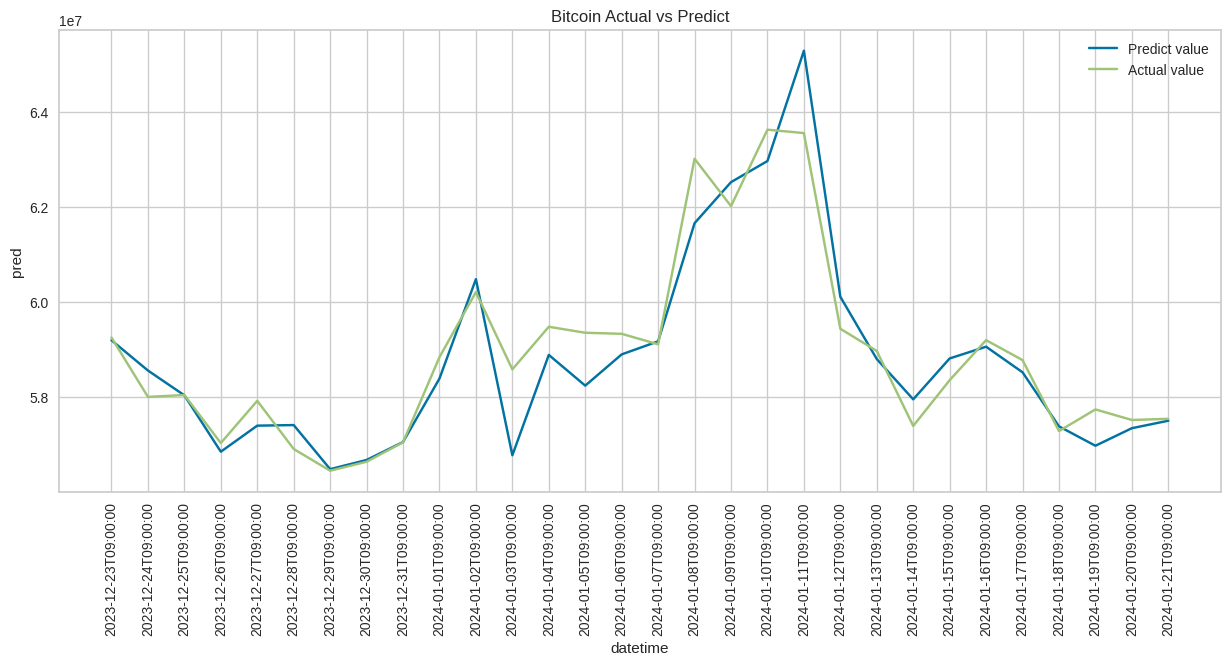

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(
    result_df,
    x=result_df["datetime"],
    y=result_df["pred"],
    label="Predict value"
)
sns.lineplot(
    result_df,
    x=result_df["datetime"],
    y=result_df["true"],
    label="Actual value"
)
plt.title("Bitcoin Actual vs Predict")
plt.xticks(rotation=90)
plt.show()